In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("data/dataset_joined.csv")
df.head(5)

,Unnamed: 0,fecha,hora,edad,genero,barrio,pregunta_1,pregunta_2,pregunta_3,pregunta_4,...,pregunta_6,pregunta_7,pregunta_8,pregunta_9,pregunta_10,pregunta_11,pregunta_12,pregunta_13,barrio_completo,poblacion_por_barrio
0,0,2019-06-14,09:09:00,27,Mujer,Constitucion,A,A,A,B,...,B,C,C,B,C,B,C,C,Constitucion,44107
1,1,2019-06-13,23:20:00,17,Mujer,Otro,A,B,B,B,...,C,C,B,B,C,B,C,C,Coghlan,18604
2,2,2019-06-13,16:33:00,15,Mujer,Recoleta,B,B,C,B,...,B,B,A,A,A,A,A,A,Recoleta,157932
3,3,2019-06-13,16:10:00,20,Mujer,Barracas,B,C,C,C,...,C,C,C,C,C,B,C,C,Barracas,89452
4,4,2019-06-13,14:29:00,39,Hombre,Almagro,B,C,B,B,...,C,B,C,B,C,C,B,C,Almagro,131699


In [9]:
df_columnas = df[["fecha",'edad', 'genero', 'barrio','barrio_completo',
       'poblacion_por_barrio']]

### Visualizamos los nulos

In [10]:
from IPython.display import Markdown, display

nulls_by_column = df_columnas.isnull().sum()
dataset_size = df.shape[0]

for column in nulls_by_column.index:
    column_nulls = nulls_by_column[column]
    null_percentage = 100 * column_nulls / dataset_size
    display(Markdown(f"* ```{column}``` tiene {column_nulls} nulos, lo cual representa el {null_percentage:.2f}%"))

* ```fecha``` tiene 0 nulos, lo cual representa el 0.00%

* ```edad``` tiene 0 nulos, lo cual representa el 0.00%

* ```genero``` tiene 0 nulos, lo cual representa el 0.00%

* ```barrio``` tiene 0 nulos, lo cual representa el 0.00%

* ```barrio_completo``` tiene 0 nulos, lo cual representa el 0.00%

* ```poblacion_por_barrio``` tiene 0 nulos, lo cual representa el 0.00%

### Visualizamos columna EDAD

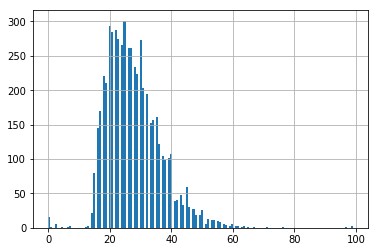

In [11]:
df.edad.hist(bins=150);

###  Podemos escribir en el plot



In [37]:
#plt.hist(df.edad, bins=150);
#plt.annotate('¿Qué hacemos con esto?', xy=(15, 50), xytext=(2.5, 300),
            #arrowprops=dict(facecolor='black', shrink=15), fontsize=16)

#plt.annotate('y esto', xy=(12.5, 600), xytext=(16, 500),
            #arrowprops=dict(facecolor='black', shrink=15), fontsize=16
            #);
#plt.savefig('esto2')

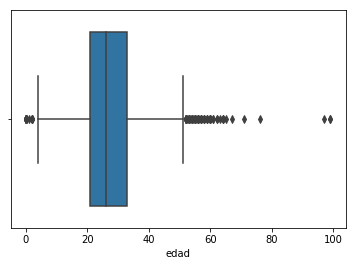

In [13]:
sns.boxplot(df.edad)

### Quitamos los outliers

In [15]:
df_edad = df["edad"]

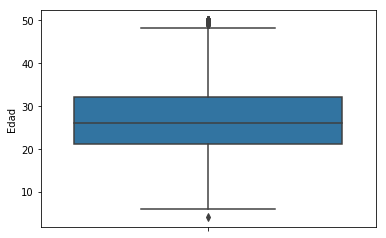

In [16]:
q1 = df_edad.quantile(0.25)
q2 = df_edad.quantile(0.5)
q3 = df_edad.quantile(0.75)

iqr = q3 - q1

up_threshold = q3 + 1.5 * iqr
low_threshold = q1 - 1.5* iqr

no_outliers_mask = (df_edad > low_threshold) & (df_edad < up_threshold)

ax = sns.boxplot(df_edad[no_outliers_mask], orient = 'v').set(
    xlabel='', 
    ylabel='Edad'
)

In [17]:
print(f"El skew es {df_edad[no_outliers_mask].skew()} cuando quitamos los outliers")

El skew es 0.5893768101027447 cuando quitamos los outliers


In [18]:
df_edad[no_outliers_mask].describe()

count    5561.000000
mean       27.400108
std         7.758342
min         4.000000
25%        21.000000
50%        26.000000
75%        32.000000
max        50.000000
Name: edad, dtype: float64

In [19]:
n_without_outliers = df_edad[no_outliers_mask].shape[0]
n_including_outliers = df_edad.shape[0]

taken_percentage = 100 * n_without_outliers / n_including_outliers
print(f"""
Sin outliers hemos tomado un {taken_percentage:.2f}% de los datos que teníamos, considerando solamente {n_including_outliers - n_without_outliers} registros como outliers
""")


Sin outliers hemos tomado un 97.97% de los datos que teníamos, considerando solamente 115 registros como outliers



### Trabajamos sobre la columna BARRIO

In [20]:
barrio = df.barrio.value_counts().head(5)

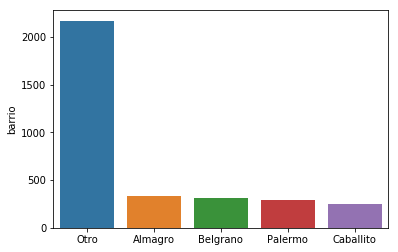

In [21]:
sns.barplot(x=barrio.index, y=barrio)

In [23]:
df.barrio

0       Constitucion
1               Otro
2           Recoleta
3           Barracas
4            Almagro
            ...     
5671       Agronomia
5672    Villa lugano
5673         Almagro
5674         Almagro
5675       Agronomia
Name: barrio, Length: 5676, dtype: object

### Podemos tirar un barplot acá

In [24]:
df["genero"].value_counts()

Mujer     4736
Hombre     912
Otro        28
Name: genero, dtype: int64

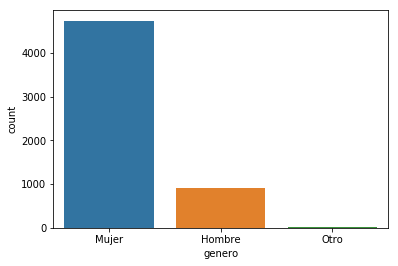

In [25]:
sns.countplot(x='genero', data=df)

In [35]:
df["barrio_completo"]

0       Constitucion
1            Coghlan
2           Recoleta
3           Barracas
4            Almagro
            ...     
5671       Agronomia
5672    Villa lugano
5673         Almagro
5674         Almagro
5675       Agronomia
Name: barrio_completo, Length: 5676, dtype: object

In [27]:
menor15mask = df["edad"] < 15
menor15 = df[menor15mask]
menor15

,Unnamed: 0,fecha,hora,edad,genero,barrio,pregunta_1,pregunta_2,pregunta_3,pregunta_4,...,pregunta_6,pregunta_7,pregunta_8,pregunta_9,pregunta_10,pregunta_11,pregunta_12,pregunta_13,barrio_completo,poblacion_por_barrio
25,25,2019-06-11,09:05:00,14,Hombre,Otro,C,C,B,B,...,B,C,B,B,C,C,C,C,Velez sarsfield,35081
27,27,2019-06-11,08:59:00,14,Hombre,Floresta,C,C,C,B,...,C,B,C,C,C,C,C,C,Floresta,37575
28,28,2019-06-11,08:56:00,14,Mujer,Belgrano,B,C,B,B,...,C,C,C,C,C,C,B,C,Belgrano,126267
30,30,2019-06-11,08:53:00,14,Mujer,La boca,C,C,B,C,...,B,C,C,C,C,C,C,C,Boca,45113
31,31,2019-06-11,08:53:00,14,Mujer,Recoleta,B,C,C,B,...,C,C,C,C,C,C,B,C,Recoleta,157932
50,50,2019-06-09,22:35:00,6,Mujer,Nunez,A,B,A,B,...,B,A,A,A,A,A,A,A,Nunez,51949
538,538,2019-05-12,16:34:00,14,Mujer,Constitucion,C,C,C,C,...,C,C,C,C,C,C,C,C,Constitucion,44107
726,726,2019-03-16,15:20:00,0,Mujer,Belgrano,C,A,C,C,...,C,A,C,C,B,C,C,C,Belgrano,126267
973,973,2019-02-14,18:53:00,14,Mujer,Boedo,B,A,C,C,...,B,C,C,C,C,C,B,C,Boedo,47306
1360,1360,2019-01-14,23:32:00,7,Mujer,Balvanera,B,A,B,B,...,B,A,C,A,C,B,A,C,Balvanera,138926


In [28]:
df_columnas = df[['fecha', 'edad', 'genero', 'barrio', 'barrio_completo',
       'poblacion_por_barrio']]

In [32]:
df[["barrio","barrio_completo"]]

,barrio,barrio_completo
0,Constitucion,Constitucion
1,Otro,Coghlan
2,Recoleta,Recoleta
3,Barracas,Barracas
4,Almagro,Almagro
...,...,...
5671,Agronomia,Agronomia
5672,Villa lugano,Villa lugano
5673,Almagro,Almagro
5674,Almagro,Almagro


In [31]:
df.barrio_completo.value_counts()

Almagro              371
Belgrano             365
Palermo              342
Caballito            296
Agronomia            273
Balvanera            234
Recoleta             216
Barracas             214
Flores               176
Villa urquiza        135
Nunez                131
Boedo                124
Villa crespo         120
Villa lugano         118
Mataderos            108
Boca                 104
San telmo            102
Constitucion         100
San cristobal         92
Monserrat             91
Retiro                90
Floresta              87
Liniers               86
Chacarita             86
Colegiales            85
Villa del parque      84
Villa luro            81
Puerto madero         80
Villa devoto          79
Parque patricios      79
Monte castro          77
Villa pueyrredon      76
San nicolas           74
Parque chacabuco      71
Paternal              71
Coghlan               70
Versalles             68
Villa real            66
Nueva pompeya         65
Villa soldati         64
